# Programmare in Python

## Esercizi: Scipy


In [2]:
import matplotlib.pyplot as plt
import numpy as np
import scipy
import scipy.integrate
from scipy.optimize import bisect

__1 - Trovate le intersezioni fra le curva $y = x^2 - 4 \,\sqrt{x}\,\,$ e la retta $\,y = 3$.__

In [ ]:
def f1(x):
    return x*x -4*np.sqrt(x)-3
x = np.linspace(0,5,100)
fig, ax = plt.subplots()
ax.plot(x,f1(x))

In [ ]:
x0 = bisect(f1, 2.5, 3.5, xtol=1e-6)
x0

__2 - Determinare  le due soluzioni più vicine all’origine di: $\sin(x) + \cos(x) = 0$. Verificare la soluzione facendo il grafico.__

In [ ]:
def f2(x):
    return np.cos(x) + np.sin(x) 
x = np.linspace(-np.pi,np.pi,100)
fig, ax = plt.subplots()
ax.plot(x,f2(x))

In [ ]:
x1 = bisect(f2, -1.0, 0.0, xtol=1e-6)
x2 = bisect(f2, 2.0, 2.5, xtol=1e-6)
print(x1,x2)
print(-np.pi/4,3*np.pi/4)

__3 - Calcolate numericamente, usando la funzione `quad`, l'integrale:__
$$\,\int_0^1 dx\,e^{-x^2}$$

In [ ]:
help(scipy.integrate.quad)

__4 - Calcolate l'integrale:__
$$\int_{-2}^2 dx\,\sqrt{4 - x^2}$$
__Confrontate con il risultato esatto $\,2\, \pi$.__ 

__5 - Calcolate numericamente, usando la funzione `quad`, l'integrale:__
$$\,\int_0^\infty dx\,e^{-x^2}$$
__Confrontate con il risultato esatto $\sqrt{ \pi}\,/\,2$.__ 

__6 - Trovate le radici dell'equazione $\,x = \sqrt{8/x -1}$ usando il metodo di bisezione. Prima di procedere determinate in quale intervallo l'equazione è definita. Fate il grafico della funzione in modo da scegliere opportunamente i parametri per il metodo di bisezione.__

In [ ]:
def f(x):
    return np.sqrt(8/x-1)-x

x = np.linspace(0.5,7.5,100)
fig, ax = plt.subplots()
ax.plot(x,f(x))

__7 - Calcolate l'integrale:__
$$\int_0^{\frac{\pi}{2}} dx\,x^3$$
__Confrontate con il risultato esatto $\frac{\pi^4}{2^6}$.__<br>
__Calcolate lo stesso integrale usando il metodo dei trapezi, variando il numero di trapezi utilizzato.__<BR>
__Ripetete tutti i passaggi per:__
    $$\int_0^{\frac{\pi}{2}} dx\,\sin^2(x)$$
__Il risultato esatto in questo caso è $\frac{\pi}{4}$.__

Caso sin**2

In [ ]:
def ff(x):
    return np.sin(x)**2

res, err = scipy.integrate.quad(ff, 0, np.pi/2)
print(f"The numerical result is {res:f} (+-{err:g})")

In [ ]:
#help(scipy.integrate.trapz)

n_trap = 10
x = np.linspace(0, np.pi/2,n_trap+1)
y = ff(x)

res1 = scipy.integrate.trapz(x,y)
print(f"The numerical result using {n_trap:d} trapezoids is {res1:18.15f}")

In [ ]:
n_trap = 5
x = np.linspace(0, np.pi/2,n_trap+1)
y = ff(x)

res1 = scipy.integrate.trapz(x,y)
print(f"The numerical result using {n_trap:d} trapezoids is {res1:18.15f}")

In [ ]:
n_trap = 2
x = np.linspace(0, np.pi/2,n_trap+1)
y = ff(x)

res1 = scipy.integrate.trapz(x,y)
print(f"The numerical result using {n_trap:d} trapezoids is {res1:18.15f}")

Caso x**3<BR>
Il risultato non sembra dipendere dal numero di trapezi. Non può essere vero per una funzione qualsiasi:

In [ ]:
def ff1(x):
    return x**3

n_trap = 5
x = np.linspace(0, 1,n_trap+1)
y = ff1(x)

res1 = scipy.integrate.trapz(x,y)
print(f"The numerical result using {n_trap:d} trapezoids is {res1:18.15f}")

n_trap = 10
x = np.linspace(0, 1,n_trap+1)
y = ff1(x)

res1 = scipy.integrate.trapz(x,y)
print(f"The numerical result using {n_trap:d} trapezoids is {res1:18.15f}")

res, err = scipy.integrate.quad(ff, 0, np.pi/2)
print(f"The numerical result using quad is {res:18.15f} (+-{err:g})")

__8 - Trovate gli zeri della funzione:__
$$ y(t) = t\,(1-t) + t\, e^{-t}$$

__9 - Importate i dati contenuti in `../Data/parabolic_data.txt`. Fate un fit dei dati utilizzando la funzione $y(x) = a x^2 +b x +c$ con $a,\,b,\,c$ come parametri liberi.__

__Sovrapponete ai dati la funzione ottenuta dal fit.__

Optimal parameters are af=1.67592, bf=2.25506, and cf=-1.12947.


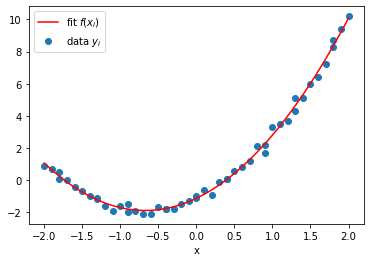

In [15]:
import numpy as np

x, y = np.loadtxt( "../Data/parabolic_data.txt", unpack=True)

def f(x, a, b, c):
    """Fit function y=f(x,p) with parameters p=(a,b,c). """
    return a * x*x + b * x + c

#call curve fit function
popt, pcov = curve_fit(f, x, y)
# extract fit parameters
af, bf, cf = popt
print(f"Optimal parameters are af={af:g}, bf={bf:g}, and cf={cf:g}.")

# best fit curve
yfitted = f(x,af,bf,cf)

#plot
import matplotlib.pyplot as plt
fig, ax = plt.subplots(figsize=(6,4))
ax.scatter(x, y, marker='o', label='data $y_i$')
ax.plot(x, yfitted, c='r', label='fit $f(x_i)$')
ax.set_xlabel('x')
ax.legend()

__10 - Importate i dati contenuti in `../Data/decay_data.txt` (05_input-output-files.ipynb). I dati (falsi) rappresentano il numero di particelle $\alpha$ rilevate al secondo vicino a un elemento radioattivo $X$. Il tempo delle misure è dato nella prima colonna in secondi a partire dall'inizio dell'esperimento. La seconda e terza colonna forniscono il numero di particelle al secondo e la corrispondente incertezza.__

- __Fate un plot dei dati. Inserite i titoli opportuni per i due assi.__

- __Il numero di nuclei non decaduti di un elemento radioattivo segue una legge del tipo:__
$$R(t) = R_0~e^{-t/\tau}$$
__dove $R_0$ è il numero di nuclei a $t=0$, e $\tau$ è la vita media. 
Il numero di decadimenti fra $t_1$ e $t_1 + 1$ è dato da__
$$D(t) = R_0~e^{-t/\tau}\left( 1 - \frac{1}{\tau} \right)\approx \frac{R_0}{\tau}~e^{-t/\tau} $$
__Fate un fit dei dati utilizzando la funzione $D(t)$ con $R_0/\tau$ e $1/\tau$ come parametri liberi.__<BR>
__Notate che `curve_fit` non riesce a determinare i parametri.__
__Due possibili soluzioni sono:__
    - __Fornire a `curve_fit` una stima del valore dei parametri (variabile p0 in input. Leggete la documentazione di `curve_fit`)__
    - __Fare il fit del logaritmo dei dati usando una retta: $\,\,\log(D(t)) = a - b*x$__

__Sovrapponete ai dati la funzione ottenuta dal fit.__<BR>
__I dati sono stati generati con $R_0 = 1\cdot 10^{14},\,\tau = 3000.$__

In [16]:
import numpy as np
from scipy.optimize import curve_fit

In [17]:
time, decay = np.loadtxt( "../Data/decay_data.txt" , unpack=True)
print(time[:5])
print(decay[:5])

[120. 240. 360. 480. 600.]
[3.15186053e+10 2.93376640e+10 3.04481552e+10 2.91939068e+10
 2.81835038e+10]


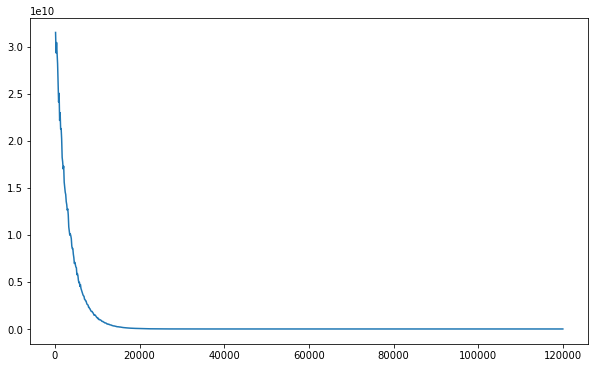

In [18]:
import matplotlib.pyplot as plt
fig,ax =plt.subplots(figsize=(10,6))
ax.plot(time,decay)

In [19]:
def f1(x, N_over_lam, inv_lam):
    """Fit function y=f(x,p) with parameters p=(N_over_lam,inv_lam). """
    return N_over_lam * np.exp(- x*inv_lam)

Il fit di default (tutti i parametri inizializzati a 1.) non funziona.

In [23]:
popt1, pcov1 = curve_fit(f1, time, decay)
N_over_tau1, inv_tau1 = popt1
print(f"Optimal parameters are N0/tau={N_over_tau1:e}, 1/tau={inv_tau1:e}.")

Optimal parameters are N0/tau=1.000000e+00, 1/tau=1.000000e+00.


Fornisco una stima dell'ordine di grandezza dei parametri da ottimizzare: 

In [24]:
popt1, pcov1 = curve_fit(f1, time, decay,p0=[1.e11,1.e-3])
N_over_tau1, inv_tau1 = popt1
print(f"Optimal parameters are N0/tau={N_over_tau1:e}, 1/tau={inv_tau1:e}.")

Optimal parameters are N0/tau=3.321573e+10, 1/tau=3.334332e-04.


Faccio il fit di log(data) con una retta. Prendo solo i primi cento dati per evitare eventuali zeri negli ultimi risultati.

In [26]:
def flog(x, a, b):
    """Fit function y=f(x,p) with parameters p=(a,b,c). """
    return a - b * x

popt2, pcov2 = curve_fit(flog, time[:100], np.log(decay[:100]))

a, b = popt2
print(f"Optimal parameters are a={a:e}, b={b:e}.")
print(f"actual parameters are a={np.log(1.e14/3e3):e}, b={1/3000:e}")

Optimal parameters are a=2.422276e+01, b=3.322916e-04.
actual parameters are a=2.422982e+01, b=3.333333e-04
